In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import RMSprop

In [39]:
img = image.load_img("C:\\Users\\aiden\Downloads\\archive\\fresh_banana\\rotated_by_15_Screen Shot 2018-06-12 at 9.38.10 PM.png")

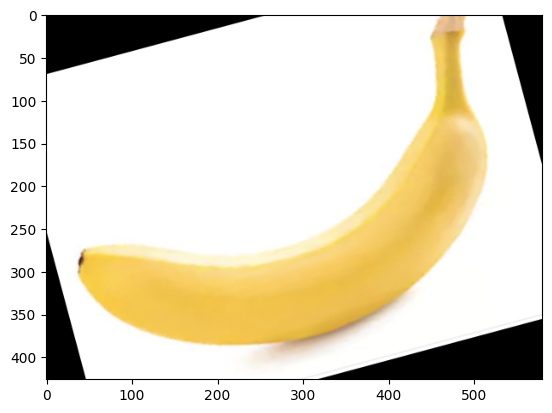

In [40]:
plt.imshow(img)

In [41]:
cv2.imread("C:\\Users\\aiden\Downloads\\archive\\fresh_banana\\rotated_by_15_Screen Shot 2018-06-12 at 9.38.10 PM.png").shape

(426, 580, 3)

In [42]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [43]:
train_dataset = train.flow_from_directory("C:\\Users\\aiden\\Downloads\\archive\\train\\",
                                            target_size=(200,200),
                                            batch_size=3,
                                            color_mode='rgb',
                                            class_mode='categorical')

validation_dataset = train.flow_from_directory("C:\\Users\\aiden\\Downloads\\archive\\validate\\",
                                            target_size=(200,200),
                                            batch_size=3,
                                            class_mode='categorical')

Found 2300 images belonging to 2 classes.


Found 731 images belonging to 2 classes.


In [44]:
train_dataset.class_indices

{'fresh': 0, 'rotten': 1}

In [45]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])


In [47]:
model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=0.001),
                metrics=['accuracy'])

In [48]:
model_fit = model.fit(train_dataset,
                        epochs=15,
                        steps_per_epoch=75,
                        validation_data=validation_dataset)

Epoch 1/15
75/75 [==============================] - 31s 404ms/step - loss: 0.7157 - accuracy: 0.7156 - val_loss: 0.1117 - val_accuracy: 0.9699
Epoch 2/15
75/75 [==============================] - 25s 332ms/step - loss: 0.2886 - accuracy: 0.9156 - val_loss: 0.0449 - val_accuracy: 0.9945
Epoch 3/15
75/75 [==============================] - 26s 346ms/step - loss: 0.2214 - accuracy: 0.9467 - val_loss: 0.1603 - val_accuracy: 0.9220
Epoch 4/15
75/75 [==============================] - 26s 344ms/step - loss: 0.1933 - accuracy: 0.9289 - val_loss: 0.0947 - val_accuracy: 0.9685
Epoch 5/15
75/75 [==============================] - 23s 312ms/step - loss: 0.1004 - accuracy: 0.9822 - val_loss: 0.0475 - val_accuracy: 0.9877
Epoch 6/15
75/75 [==============================] - 24s 314ms/step - loss: 0.1835 - accuracy: 0.9333 - val_loss: 0.1404 - val_accuracy: 0.9617
Epoch 7/15
75/75 [==============================] - 23s 313ms/step - loss: 0.1729 - accuracy: 0.9689 - val_loss: 0.2618 - val_accuracy: 0.9015

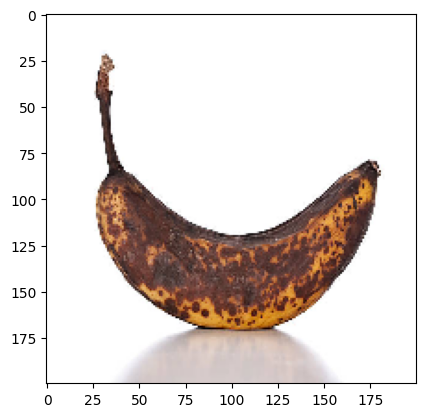

1/1 [==============================] - 0s 42ms/step
[[1.]]
Rotten


In [50]:
testImg = image.load_img("Rotten Banana.jpg", target_size=(200,200))
plt.imshow(testImg)
plt.show()

X = image.img_to_array(testImg)
X = np.expand_dims(X,axis=0)
images = np.vstack([X])

val = model.predict(images)

print(train_dataset.class_indices)
print(val)

# if val == 0:
#     print("Fresh")
# else:
#     print("Rotten")

1/1 [==============================] - 0s 42ms/step


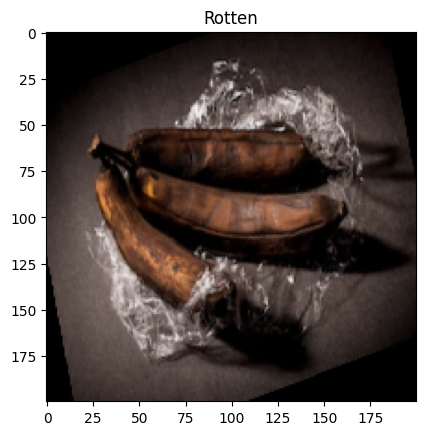

1/1 [==============================] - 0s 39ms/step


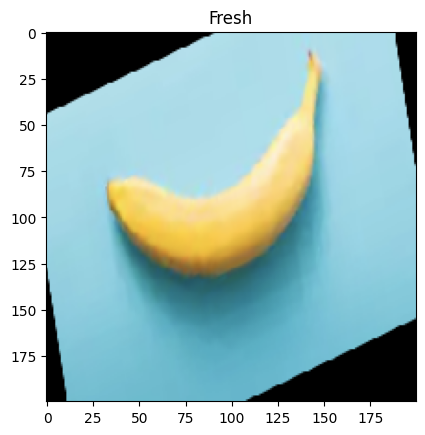

1/1 [==============================] - 0s 37ms/step


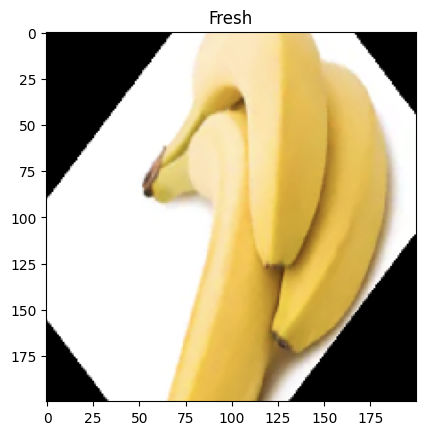

1/1 [==============================] - 0s 49ms/step


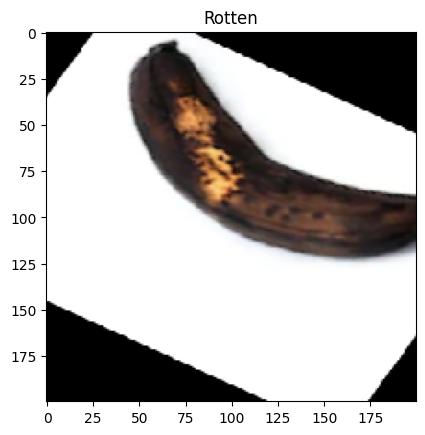

1/1 [==============================] - 0s 43ms/step


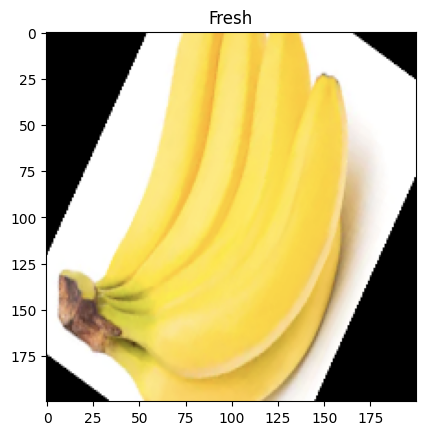

1/1 [==============================] - 0s 49ms/step


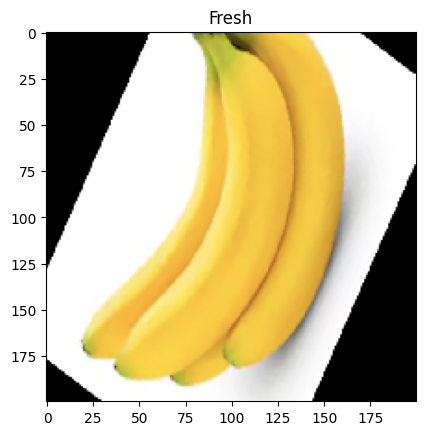

1/1 [==============================] - 0s 35ms/step


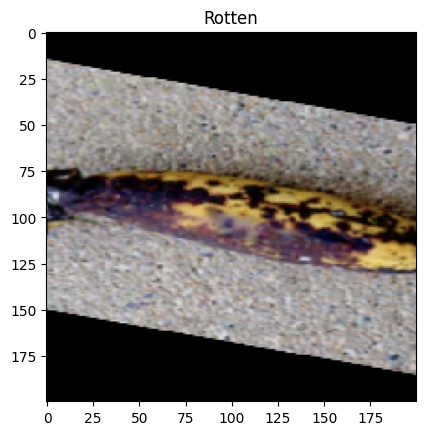

1/1 [==============================] - 0s 61ms/step


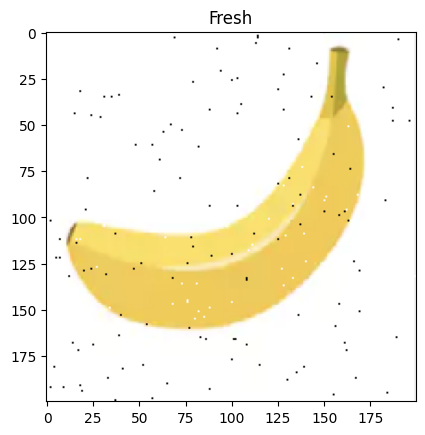

1/1 [==============================] - 0s 32ms/step


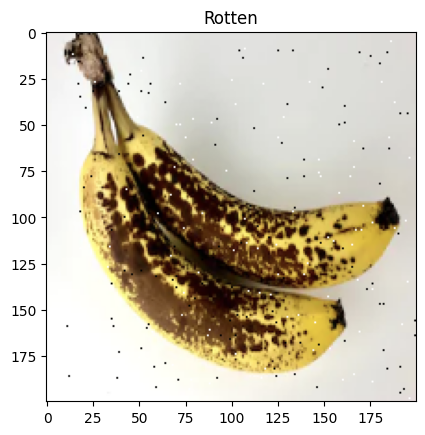

1/1 [==============================] - 0s 46ms/step


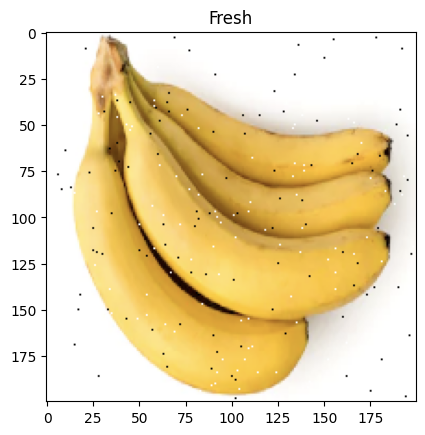

1/1 [==============================] - 0s 48ms/step


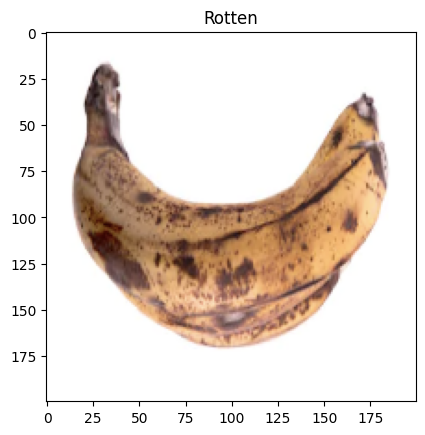

1/1 [==============================] - 0s 42ms/step


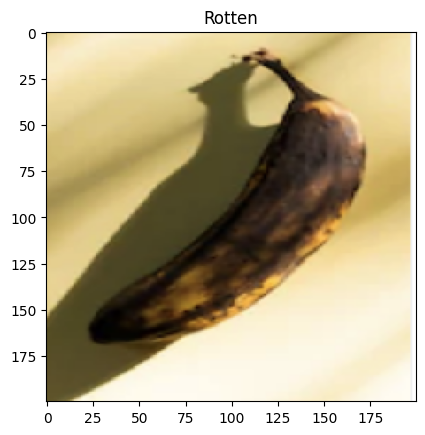

1/1 [==============================] - 0s 60ms/step


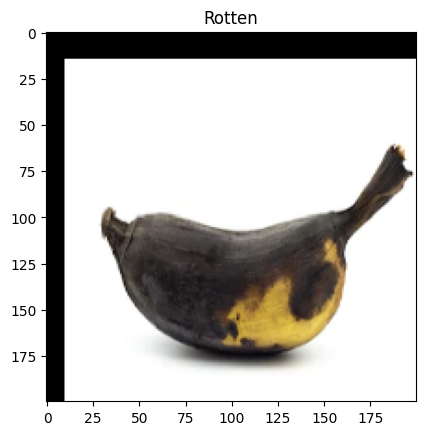

1/1 [==============================] - 0s 46ms/step


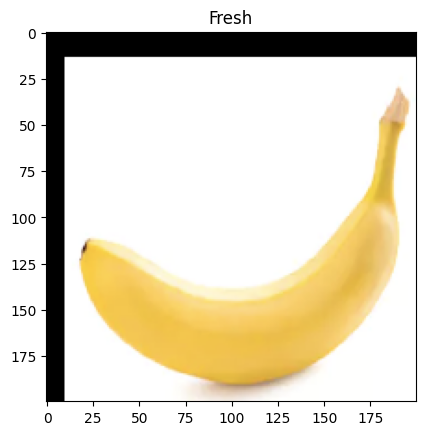

1/1 [==============================] - 0s 38ms/step


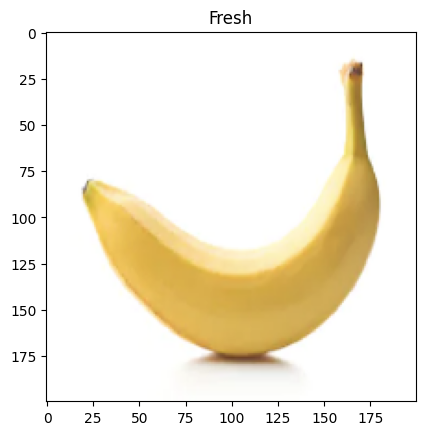

1/1 [==============================] - 0s 99ms/step


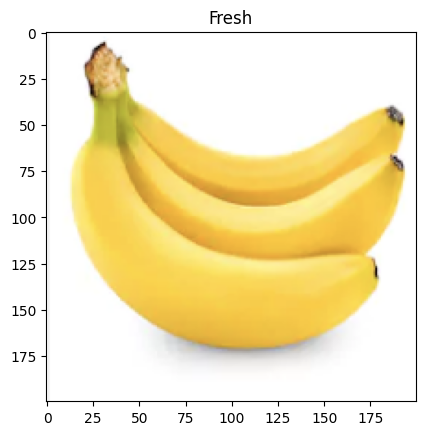

In [54]:
path = "C:\\Users\\aiden\\Downloads\\archive\\test\\"

for i in os.listdir(path):
    img = image.load_img(path + i, target_size=(200,200))
    plt.imshow(img)

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])

    val = model.predict(images)

    if val == 0:
        plt.title("Fresh")
    else:
        plt.title("Rotten")
    plt.show()